In [46]:
import os

dir = str(os.getcwd())
split_dir = dir.split('\\')

# Set the github repository directory
for folder in reversed(split_dir):
    if folder != 'AA_Project_G6' and 'AA_Project_G6' in split_dir:
        os.chdir(os.path.dirname(os.getcwd()))
    else:
        break

print('Current directory:', os.getcwd())

Current directory: c:\Users\AndreLopes\Desktop\git\AA_Project_G6


In [47]:
import pandas as pd
import numpy as np

# Import data from .csv file
df = pd.read_csv(filepath_or_buffer='./data/raw/credit_card_churn.csv', delimiter=',')

df.info()

df.isna().sum()

# Drop rows with the same client ID
df.drop_duplicates(subset='CLIENTNUM')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294


In [48]:
# Drop CLIENTNUM and Naive Bayes related columns
df.drop(['CLIENTNUM',
         'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
        'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
       axis=1, inplace=True)

# Classify the types of features in the dataframe
cat_feats = []
num_feats = []
for feat in df.columns:
    if feat == 'Attrition_Flag':
        None
    else:
        if df[feat].dtype == 'O':
            cat_feats.append(feat)
        else:
            num_feats.append(feat)

print('There are {} categorical features: {}'.format(len(cat_feats), cat_feats))
print('There are {} numerical features: {}'.format(len(num_feats), num_feats))

# Encode the categorical columns
dummies = pd.get_dummies(df[['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']], drop_first=True)

# Merge encoded columns with original dataframe
df2 = df.join(dummies)

# Drop categorical columns
df2 = df2.drop(columns=['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category'])

There are 5 categorical features: ['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']
There are 14 numerical features: ['Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']


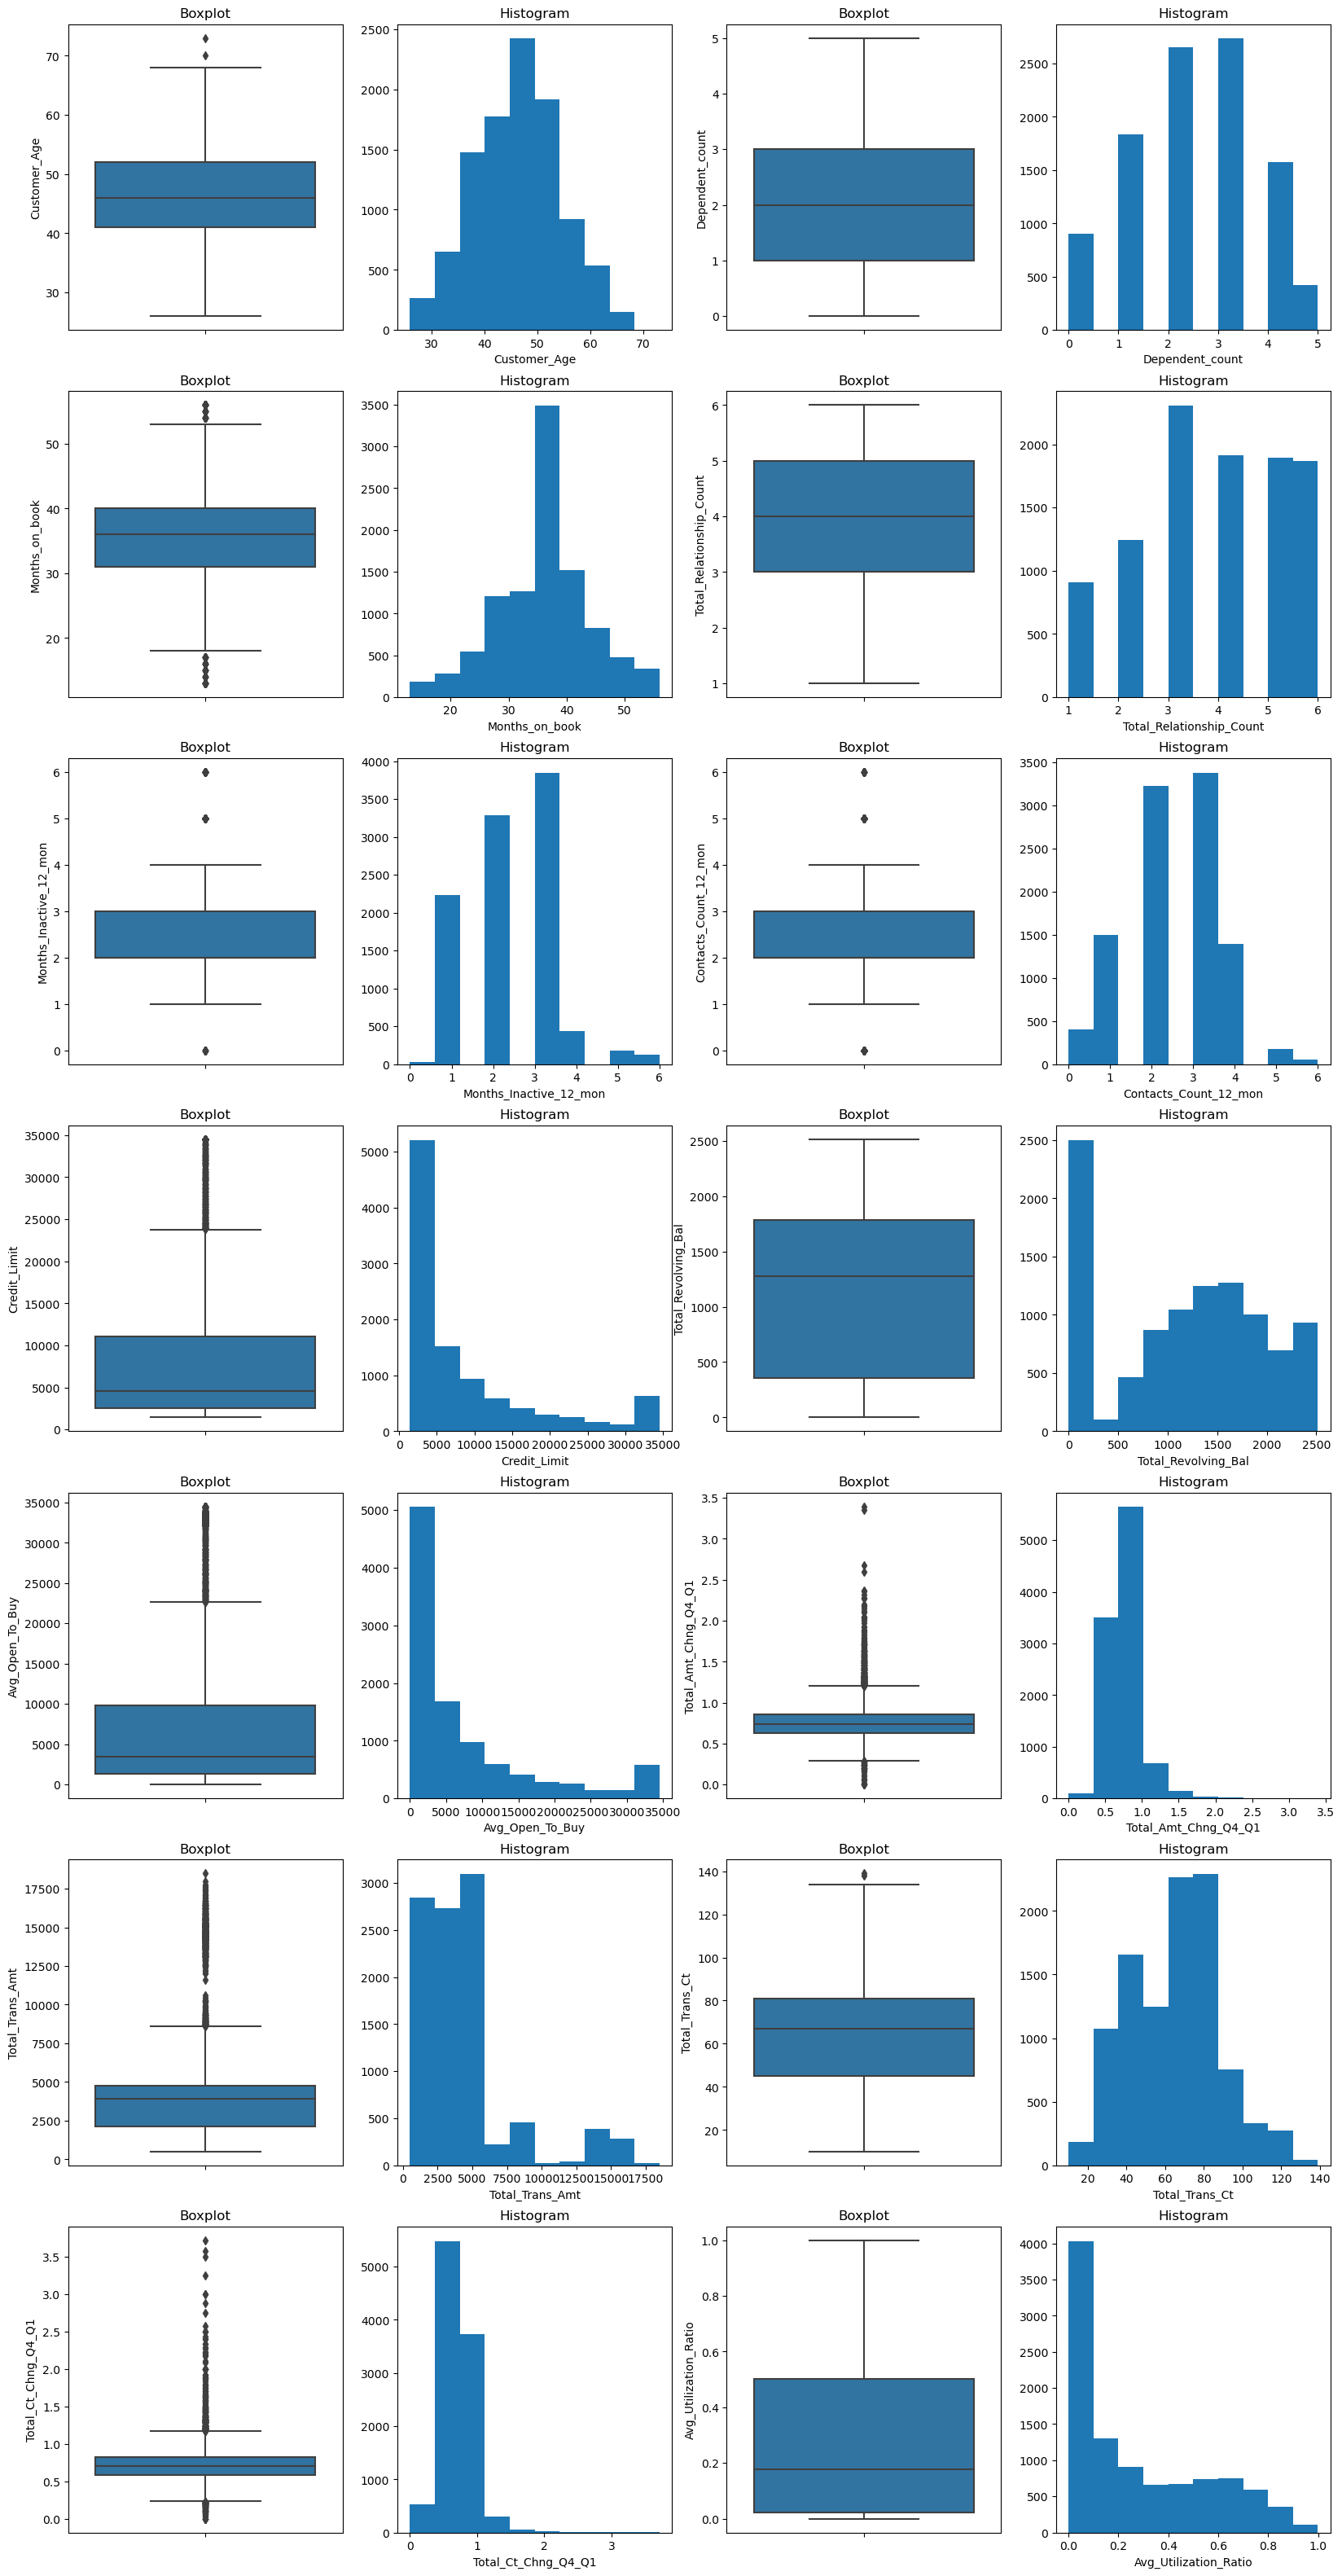

In [49]:
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import seaborn as sns

# Boxplots, histograms for numerical features
plt.figure(figsize=(20, 40))

for i,feat in enumerate(num_feats):
    # Boxplot
    plt.subplot(7,4,2*i+1)
    sns.boxplot(y=df[num_feats[i]])
    plt.title('Boxplot')

    # Histogram
    plt.subplot(7,4,2*i+2)
    plt.hist(x=df[num_feats[i]])
    plt.xlabel(feat)    
    plt.title('Histogram')

plt.show()

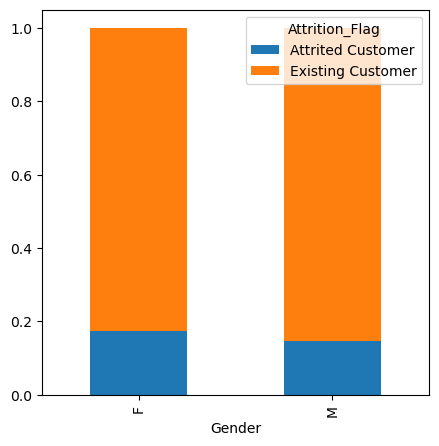

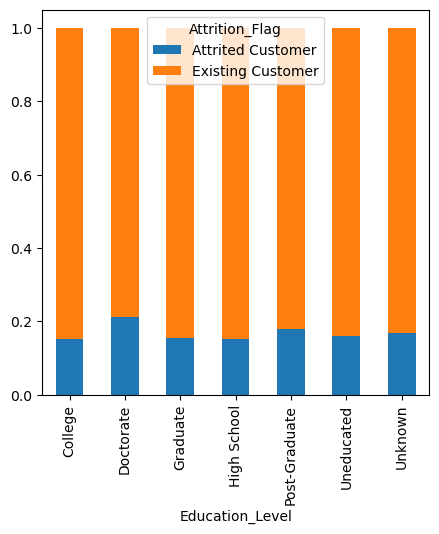

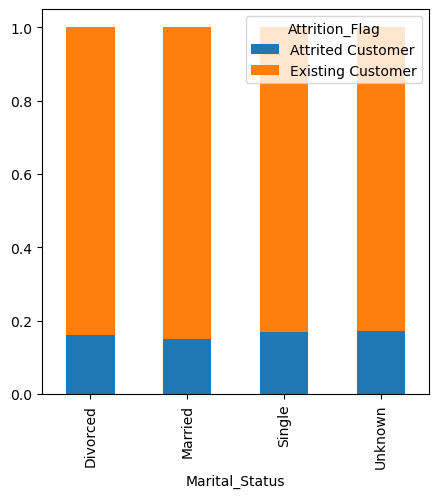

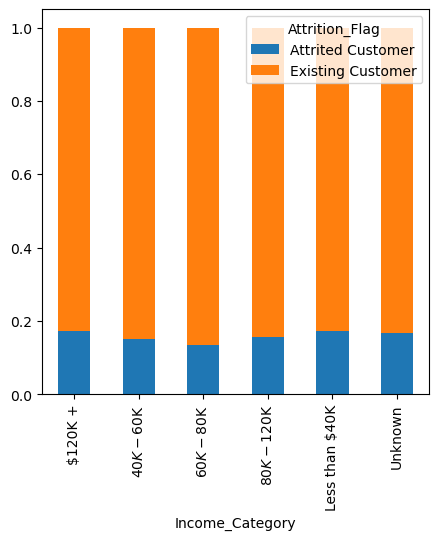

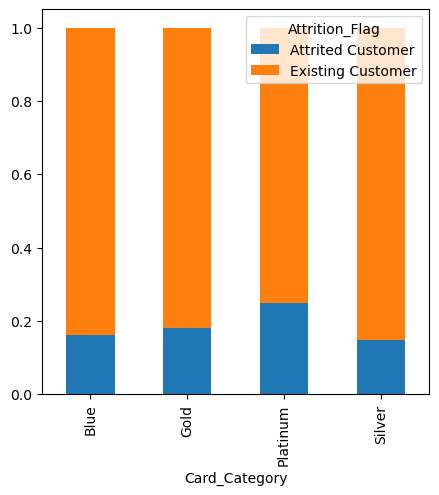

In [50]:
# Bar charts for categorical features

for i,feat in enumerate(cat_feats):
    # Create a cross-tabulation of the data
    ctab = pd.crosstab(index=df[feat], columns=df['Attrition_Flag'], normalize='index')
    ctab.plot(kind='bar', stacked='True', figsize=(5,5))
    
plt.show()

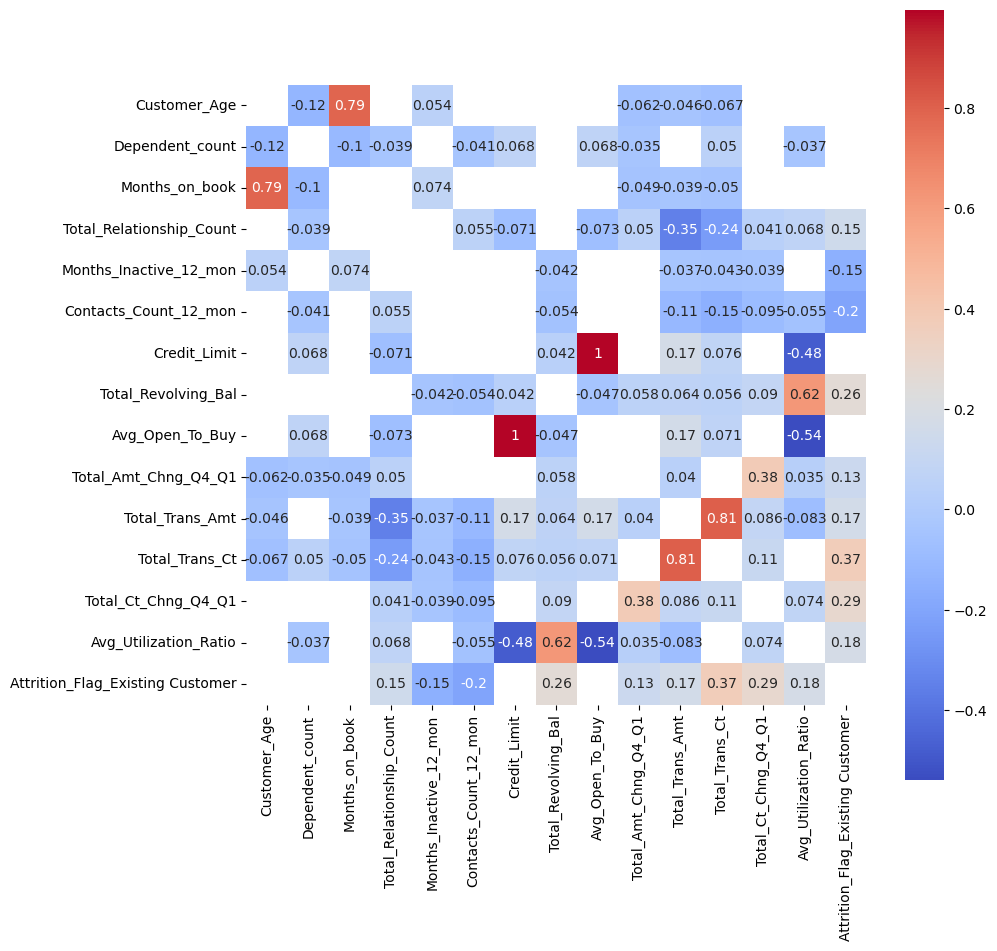

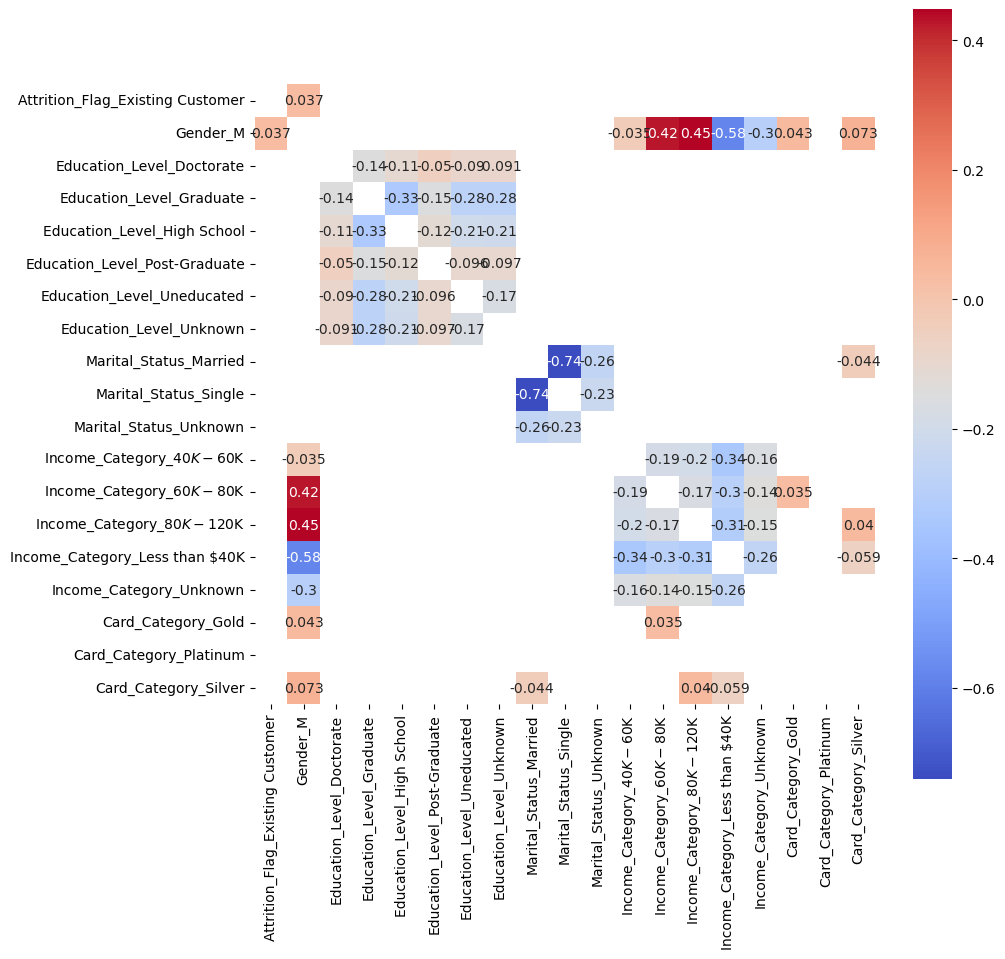

In [51]:
# Numerical features correlations heatmap
df_num = df2[num_feats]
df_num = df_num.join(df2['Attrition_Flag_Existing Customer'])
df_num_corrs = df_num.corr(method='pearson', numeric_only=True)
pval = df_num.corr(method=lambda x,y: pearsonr(x,y)[1], numeric_only=True)
mask = pval > 0.1/100
plt.subplots(figsize=(10,10))
heatmap = sns.heatmap(df_num_corrs, mask=mask, square=True, cmap='coolwarm', annot=True)

# Categorical features correlations heatmap
df_cat = dummies
df_cat_corrs = df_cat.corr(method='pearson', numeric_only=False)
pval = df_cat.corr(method=lambda x,y: pearsonr(x,y)[1], numeric_only=True)
mask = pval > 0.1/100
plt.subplots(figsize=(10,10))
heatmap = sns.heatmap(df_cat_corrs, mask=mask, square=True, cmap='coolwarm', annot=True)

In [52]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split, KFold

# Create the input and output matrices, split in training and testing subsets
y = df2.copy()['Attrition_Flag_Existing Customer']
X = df2.copy().drop(columns=['Attrition_Flag_Existing Customer'])
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=0)

## Add a constant to the input matrix, to fit a interception coefficient 
X2 = sm.add_constant(X_train)

## Fit the logistic regression model
log_reg = sm.Logit(y_train, X2).fit()

## Print the summary of the model
print(log_reg.summary())

         Current function value: inf
         Iterations: 35
                                  Logit Regression Results                                  
Dep. Variable:     Attrition_Flag_Existing Customer   No. Observations:                 7088
Model:                                        Logit   Df Residuals:                     7055
Method:                                         MLE   Df Model:                           32
Date:                              Mon, 16 Jan 2023   Pseudo R-squ.:                     inf
Time:                                      17:14:01   Log-Likelihood:                   -inf
converged:                                    False   LL-Null:                        0.0000
Covariance Type:                          nonrobust   LLR p-value:                     1.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------

c:\Users\AndreLopes\miniconda3\envs\adv_automation\lib\site-packages\statsmodels\discrete\discrete_model.py:1819: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
c:\Users\AndreLopes\miniconda3\envs\adv_automation\lib\site-packages\statsmodels\discrete\discrete_model.py:1872: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
c:\Users\AndreLopes\miniconda3\envs\adv_automation\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\AndreLopes\miniconda3\envs\adv_automation\lib\site-packages\statsmodels\base\model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
c:\Users\AndreLopes\miniconda3\envs\adv_automation\lib\site-packages\statsmodels\base\model.py:592: